<a href="https://colab.research.google.com/github/Numanur/data-science-ml/blob/main/basic_machine_learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

#**Gradient Decent**

Gradient decent is an algorithm that finds the best fit line for the given dataset.

A cost function is a mathematical formula used in machine learning and deep learning to measure how well a model is performing. It evaluates the difference between the predicted values and the actual (true) values from the dataset.

$$
\text{MSE} = \frac{1}{n} \sum_{i=1}^{n}(y_i - \hat{y}_i)^2
$$

where, we can replace the $\hat{y}_i$ with its equation.

$$\hat{y}_i = m*x_i + b$$
$\hat{y}_i$ is the predicted value by the regression model.

In [3]:
def gradient_decent(x, y):
  m_curr = b_curr = 9
  iterations = 2000
  n = len(x)
  learning_rate = 0.065
  for i in range(iterations):
    y_predicted = m_curr*x + b_curr
    mse = (1/n)*sum([val**2 for val in (y - y_predicted)])
    dm = -(2/n)*sum(x*(y - y_predicted))
    db = -(2/n)*sum(y - y_predicted)
    m_curr = m_curr - learning_rate*dm
    b_curr = b_curr - learning_rate*db
    print(f"m = {m_curr} b={b_curr} cost={mse} iteration={i}")

x = np.array([1, 2, 3, 4, 5])
y = np.array([5, 7, 9, 11, 13])
gradient_decent(x, y)


m = -3.3499999999999996 b=5.49 cost=827.0 iteration=0
m = 3.3293999999999997 b=7.2528 cost=241.11859999999993 iteration=1
m = -0.23023400000000027 b=6.18147 cost=71.44868971999999 iteration=2
m = 1.7182273200000004 b=6.63767016 cost=22.26259661933601 iteration=3
m = 0.7024708900000001 b=6.274664384399999 cost=7.956022048457261 iteration=4
m = 1.2808184073840003 b=6.354994367328 cost=3.7489923492937645 iteration=5
m = 1.0008002815669597 b=6.1993259206956 cost=2.468329845661194 iteration=6
m = 1.1819187698549232 b=6.173101441194057 cost=2.0374938425106595 iteration=7
m = 1.1142653668967006 b=6.07964993359541 cost=1.855270264057403 iteration=8
m = 1.1798024181322089 b=6.024731949138293 cost=1.7475123324408282 iteration=9
m = 1.1730395000392158 b=5.951393852678754 cost=1.6637011875685577 iteration=10
m = 1.2045494124384233 b=5.890227246815222 cost=1.5891092111247853 iteration=11
m = 1.2148551263935414 b=5.824723433878258 cost=1.5193737780118524 iteration=12
m = 1.2359701564382566 b=5.76371

**Here after 1520 iterations, I am getting the same cost. So here it converges.**

#**Logistic Regression**
Logistic regression is used to predict the category or class. It can be `binary` classification such as `Yes/No` or `True/False` or `0/1` value.
It uses a threeshold to predict the class.
By default, the threshold is usually 0.5:

$\hat{y} \geq 0.5 → class=1 (positive)$

$\hat{y} < 0.5 → class=0 (negative)$

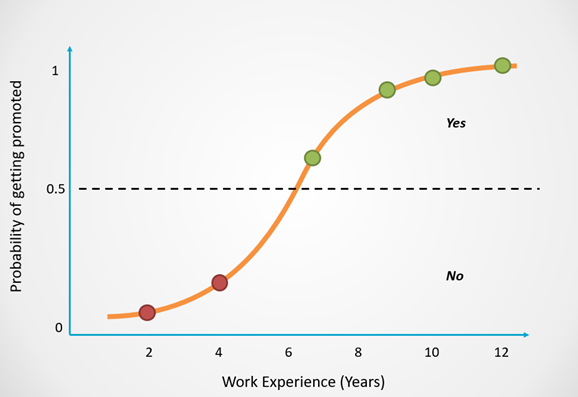

In [4]:
from IPython.display import Image, display
display(Image('/content/drive/MyDrive/Colab Datasets/images/logistic.png'))


In [5]:
df = pd.read_csv("/content/drive/MyDrive/Colab Datasets/insurance_data.csv")
df.head()

,age,bought_insurance
0,22,0
1,25,0
2,47,1
3,52,0
4,46,1


<Axes: xlabel='age', ylabel='bought_insurance'>

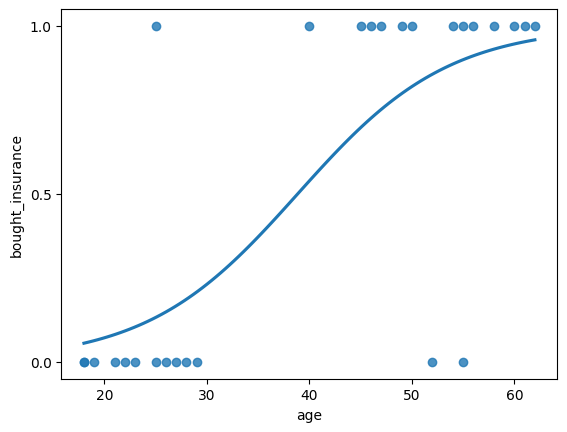

In [11]:
plt.yticks([0, 0.5, 1])
sns.regplot(df, x="age", y="bought_insurance",logistic=True, ci=None)

In [22]:
np.random.seed(1)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df[["age"]], df["bought_insurance"], test_size=0.1)

from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [50]:
model.predict(X_test)

array([1, 1, 0])

In [71]:
new_value = pd.DataFrame([[35]], columns=["age"])
new_pred = model.predict(new_value)
print(f"Output is(0 or 1): {new_pred[0]}")

Output is(0 or 1): 0


In [72]:
new_value = pd.DataFrame([[41]], columns=["age"])
new_pred = model.predict(new_value)
print(f"Output is(0 or 1): {new_pred[0]}")

Output is(0 or 1): 1


In [52]:
y_test

,bought_insurance
17,1
14,1
18,0


In [26]:
model.predict(X_test)

array([1, 1, 0])

In [40]:
model.score(X_test, y_test)

1.0

**Find the Coefficient and Intercept for the dataset**

In [30]:
model.coef_

array([[0.12627793]])

In [32]:
model.intercept_

array([-4.97335871])

#Let's implement sigmoid function to calculate the output

In [34]:
import math
def sigmoid(x):
  return 1/(1+math.exp(-x))

In [36]:
def predict_function(age):
  y = 0.126*age - 4.97
  z = sigmoid(y)
  return z

In [67]:
age = 35
predict_function(age)

0.3635474597184338

**Which means person of age 35 will not buy insurance**

In [69]:
age = 41
predict_function(age)

0.5488437349470519

**This age will buy insurance.**